In [9]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# Интеллект	и	размер	головного	мозга

Исследование проводилось среди студентов психологического факультета крупного университета. Все испытуемые должны были быть правшами, а также не иметь повреждений мозга, эпилепсии, алкоголизма и сердечных заболевании. Участники предварительного этапа эксперимента прошли несколько IQ-тестов, после чего для дальнейшего участия было отобрано 20 мужчин и 20 женщин, имевших коэффициент интеллекта либо ниже 103, либо выше 130 баллов. Для каждого из отобранных при помощи магнитно-резонансной томографии были получены 18 снимков срезов головного мозга, и общее количество пикселей на всех 18 снимках было принято в качестве меры объёма мозга. Помимо этого, были собраны данные о росте и массе тела испытуемых. 
   
**Задача.** Исследовать взаимосвязи между коэффициентами интеллекта и биологическими характеристиками испытуемых (пол, рост, вес, объём мозга). 

In [42]:
brain_data = pd.read_excel('./brain.xlsx', sheet_name=1)

In [43]:
brain_data.head()

,Пол,FS_IQ,V_IQ,P_IQ,Вес,Рост,MRI_Pixels
0,женский,133,132,124,53.0,164.0,816932
1,мужской,140,150,124,NaN,184.0,1001121
2,мужской,139,123,150,65.0,186.0,1038437
3,мужской,133,129,128,78.0,175.0,965353
4,женский,137,132,134,67.0,165.0,951545


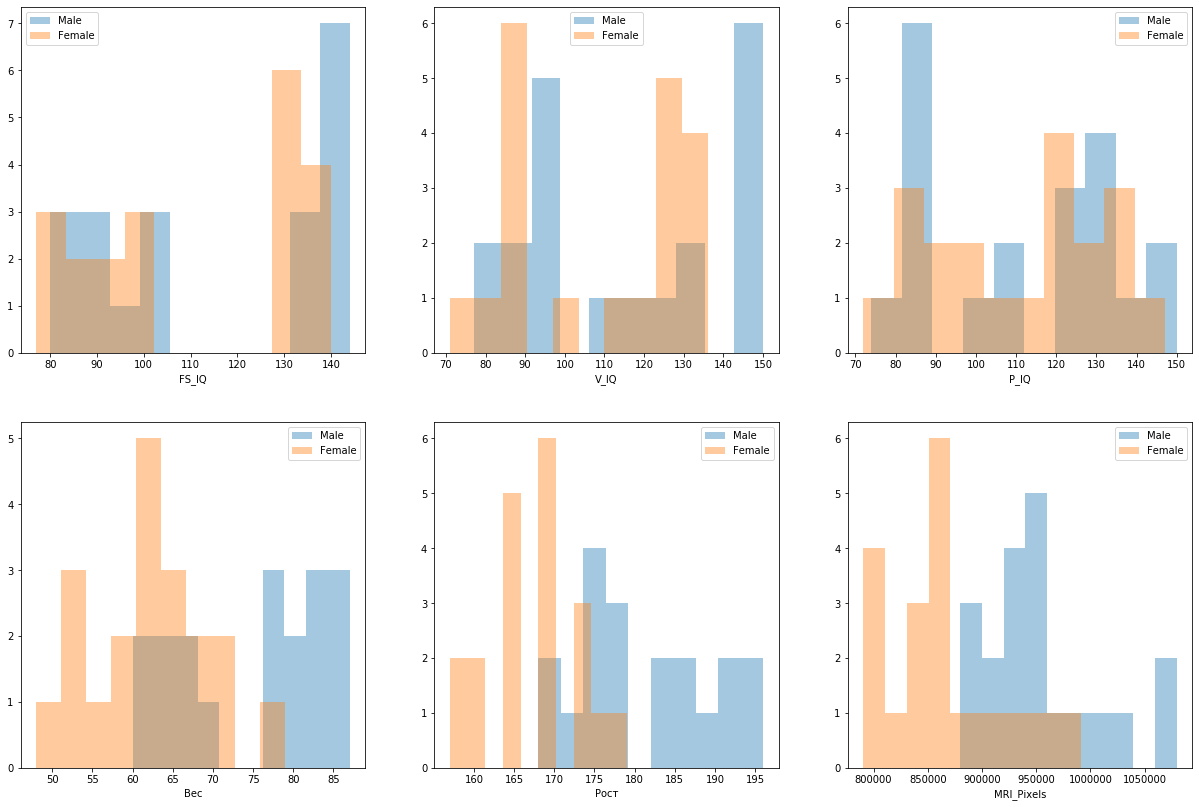

In [54]:
fig, axes = plt.subplots(2, 3, figsize=[21, 14])

sns.distplot(brain_data.loc[brain_data['Пол'] == 'мужской']['FS_IQ'], bins=10, label='Male', kde=False, ax=axes[0][0])
sns.distplot(brain_data.loc[brain_data['Пол'] == 'женский']['FS_IQ'], bins=10, label='Female', kde=False, ax=axes[0][0])
axes[0][0].legend()

sns.distplot(brain_data.loc[brain_data['Пол'] == 'мужской']['V_IQ'], bins=10, label='Male', kde=False, ax=axes[0][1])
sns.distplot(brain_data.loc[brain_data['Пол'] == 'женский']['V_IQ'], bins=10, label='Female', kde=False, ax=axes[0][1])
axes[0][1].legend()

sns.distplot(brain_data.loc[brain_data['Пол'] == 'мужской']['P_IQ'], bins=10, label='Male', kde=False, ax=axes[0][2])
sns.distplot(brain_data.loc[brain_data['Пол'] == 'женский']['P_IQ'], bins=10, label='Female', kde=False, ax=axes[0][2])
axes[0][2].legend()

sns.distplot(brain_data.loc[brain_data['Пол'] == 'мужской']['Вес'], bins=10, label='Male', kde=False, ax=axes[1][0])
sns.distplot(brain_data.loc[brain_data['Пол'] == 'женский']['Вес'], bins=10, label='Female', kde=False, ax=axes[1][0])
axes[1][0].legend()

sns.distplot(brain_data.loc[brain_data['Пол'] == 'мужской']['Рост'], bins=10, label='Male', kde=False, ax=axes[1][1])
sns.distplot(brain_data.loc[brain_data['Пол'] == 'женский']['Рост'], bins=10, label='Female', kde=False, ax=axes[1][1])
axes[1][1].legend()

sns.distplot(brain_data.loc[brain_data['Пол'] == 'мужской']['MRI_Pixels'], bins=10, label='Male', kde=False, ax=axes[1][2])
sns.distplot(brain_data.loc[brain_data['Пол'] == 'женский']['MRI_Pixels'], bins=10, label='Female', kde=False, ax=axes[1][2])
axes[1][2].legend()

plt.show()

# Оценка	массовой	доли	жира

Массовая доля жира, важная характеристика здоровья, рассчитывается через плотность тела, измеряемую при помощи взвешивания в воде. Для 252 мужчин проведены такие расчёты. Имеются также данные антропометрии (возраст, рост, вес, обхват грудной клетки и т.д.) 

**Задача.** Построить функцию, оценивающую массовую долю жира по легко измеряемым антропометрическим признакам. 

In [38]:
fat_data = pd.read_excel('./fat.xls')

In [39]:
fat_data.head()

,№,Доля жира по формуле Брожека (457/плотность - 414.2),Доля жира по формуле Сири (495/плотность- 450),Плотность (г*см^3),Возраст,"Вес, фунт","Рост, дюйм",Индекс массы тела (вес/рост^2),Вес без учёта жира (вес * (1-доля по ф-ле Брожека)),"Окружность шеи, см","Обхват грудной клетки, см","Окружность талии, см","Окружность бёдер, см","Окружность бедра, см","Окружность колена, см","Окружность лодыжки, см","Окружность бицепса, см","Окружность предплечья, см","Окружность запястья, см"
0,1,12.6,12.3,1.0708,23,154.25,67.75,23.7,134.9,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,2,6.9,6.1,1.0853,22,173.25,72.25,23.4,161.3,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,3,24.6,25.3,1.0414,22,154.00,66.25,24.7,116.0,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,4,10.9,10.4,1.0751,26,184.75,72.25,24.9,164.7,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,5,27.8,28.7,1.0340,24,184.25,71.25,25.6,133.1,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
